### Q1. Problem Statement: ROC, AUC, Precision, Recall, and F1 Score

Load the 'Breast Cancer_Dataset.csv dataset into a DataFrame and perform the following lasks:

1. Identify the null values and remove the null rows and columns by using the dropna() function

2. Considering the 'diagnosis' column as the target, encode the 'diagnosis' column using the LabelEncoder()

3. Separate the target variable and the feature vectors

4. Split the dataset into the training set and test set in a 70:30 ratio

5. Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and Random ForestClassifier models; Also, print their accuracies

6. Calculate the ROC AUC score based on the False Positive Rate (FPR) and True Positive Rate (TPR)

7. Plot the ROC Curve using the Matplotlib library

8. Calculate the F1 Score

9. Calculate and Print the Precision, Recall, and F1 score using the classification_report() function

step 1:Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

step 2:Load the csv data into DataFrame

In [2]:
data=pd.read_csv("Breast_Cancer_Dataset.csv")
df = data.copy()
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
481,91227,B,13.90,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.020700,...,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603,NaN
213,881094802,M,17.42,25.56,114.50,948.0,0.10060,0.11460,0.168200,0.065970,...,28.07,120.40,1021.0,0.12430,0.17930,0.28030,0.10990,0.1603,0.06818,NaN
309,893548,B,13.05,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,...,17.40,93.96,672.4,0.10160,0.05847,0.01824,0.03532,0.2107,0.06580,NaN
460,911296201,M,17.08,27.15,111.20,930.9,0.09898,0.11100,0.100700,0.064310,...,34.49,152.10,1648.0,0.16000,0.24440,0.26390,0.15550,0.3010,0.09060,NaN
477,911673,B,13.90,16.62,88.97,599.4,0.06828,0.05319,0.022240,0.013390,...,21.80,101.20,718.9,0.09384,0.20060,0.13840,0.06222,0.2679,0.07698,NaN
119,865128,M,17.95,20.01,114.20,982.0,0.08402,0.06722,0.072930,0.055960,...,27.83,129.20,1261.0,0.10720,0.12020,0.22490,0.11850,0.4882,0.06111,NaN
100,862717,M,13.61,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.044890,...,35.27,108.60,906.5,0.12650,0.19430,0.31690,0.11840,0.2651,0.07397,NaN
490,91376701,B,12.25,22.44,78.18,466.5,0.08192,0.05200,0.017140,0.012610,...,31.99,92.74,622.9,0.12560,0.18040,0.12300,0.06335,0.3100,0.08203,NaN
180,873592,M,27.22,21.87,182.10,2250.0,0.10940,0.19140,0.287100,0.187800,...,32.85,220.80,3216.0,0.14720,0.40340,0.53400,0.26880,0.2856,0.08082,NaN
395,903811,B,14.06,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.032510,...,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609,NaN


step 3:Identifying adn dropping the null rows/columns.

In [3]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df = df.iloc[:,:-1]

step 4:Encoding the 'diagnosis' columns using the LabelEncoder

In [5]:
le = preprocessing.LabelEncoder()
df.diagnosis = le.fit_transform(df['diagnosis'])


step 5: separating the target variable and the feature vectors

In [6]:
X = df.drop(["diagnosis"],axis=1) #features
y = df["diagnosis"] #Target variable

### **Step 6 : Splitting the dataset into training set and testing set**

In [12]:
# Splitting the dataset into training set and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### **Step-7: Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and Random ForestClassifier models. Also, print thier respective accuracies.**

Hint: You can declare the algorithms in a list and iterate through them to build thier respective models and calcult thier accuracies using a for loop.

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

models = []

models.append(('Logistic Regression', LogisticRegression()))

models.append(('Naive Bayes', GaussianNB()))

models.append(('Decision Tree', DecisionTreeClassifier()))

models.append(('K-NN', KNeighborsClassifier()))

models.append(('SVM', SVC()))
models.append(('RandomForestClassifier', RandomForestClassifier()))

for name, model in models:
    model=model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    from sklearn import metrics

    print("%s -> ACC: %%%.2f" % (name,metrics.accuracy_score(y_test,y_pred)*100))

C:\Users\divu2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression -> ACC: %92.40
Naive Bayes -> ACC: %63.16
Decision Tree -> ACC: %93.57
K-NN -> ACC: %76.61
SVM -> ACC: %63.16
RandomForestClassifier -> ACC: %93.57


### **Step 8 Calculating the ROC AUC score based on False Positive rate(FPR) and True Positive Rate(TPR)**

In [14]:
import sklearn.metrics as metrics

# Calculate the fpr and tpr for all thresholds of the classification
probs=model.predict_proba(X_test)
preds=probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)

roc_auc = metrics.auc(fpr, tpr)
print("ROC_AUC Score is:")

roc_auc

ROC_AUC Score is:


np.float64(0.9292328042328042)

### **Step-9: Plotting the ROC Curve using the Matplotlib library.**

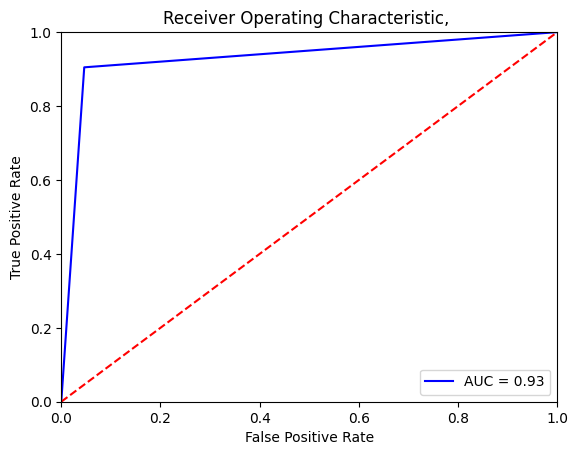

In [15]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic, ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Step-10: Calculating the F1 Score.**

In [16]:
from sklearn.metrics import f1_score
print("F1 score is:")
f1_score(y_test,y_pred)

F1 score is:


0.912

### **Step-11: Calculating and Printing the Precision, Recall, and F1 Score using the classification_report() function.**

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

